In [ ]:
pip install wooldridge

In [ ]:
pip install stargazer

# EJERCICIOS EN COMPUTADORA

## Problema 1

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

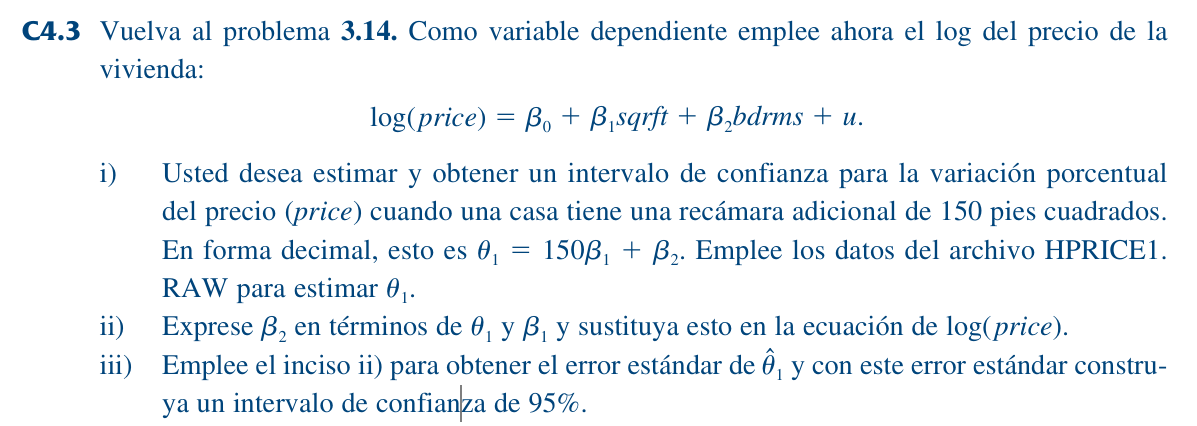

In [ ]:
df = data("hprice1")
df.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


## Item I

In [ ]:
modelo = smf.ols("lprice ~ sqrft + bdrms", df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     60.73
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.17e-17
Time:                        03:44:16   Log-Likelihood:                 19.592
No. Observations:                  88   AIC:                            -33.18
Df Residuals:                      85   BIC:                            -25.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7660      0.097     49.112      0.0

In [ ]:
# Extraemos los coeficientes y los errores estándar para 'sqrft' y 'bdrms'
coef_sqrft = modelo.params['sqrft']
coef_bdrms = modelo.params['bdrms']
stderr_sqrft = modelo.bse['sqrft']
stderr_bdrms = modelo.bse['bdrms']

# Estimación de theta1 (variación porcentual cuando se aumenta en 150 pies cuadrados)
theta1_est = 150 * coef_sqrft + coef_bdrms

# Intervalo de confianza para theta1
conf_interval_sqrft = modelo.conf_int().loc['sqrft']
conf_interval_bdrms = modelo.conf_int().loc['bdrms']

# Calculamos el intervalo de confianza de theta1
theta1_lower = 150 * conf_interval_sqrft[0] + conf_interval_bdrms[0]
theta1_upper = 150 * conf_interval_sqrft[1] + conf_interval_bdrms[1]

# Resultados
theta1_est, theta1_lower, theta1_upper

(0.08580134170666087, 0.013975045808722539, 0.15762763760459922)

## Item II

Para expresar $ \beta_2 $ en términos de $ \theta_1 $ y $ \beta_1 $, partimos de la ecuación dada:

$$
\theta_1 = 150 \cdot \beta_1 + \beta_2
$$

### Paso 1: Despejar $ \beta_2 $
Despejamos $ \beta_2 $ de la ecuación:

$$
\beta_2 = \theta_1 - 150 \cdot \beta_1
$$

### Paso 2: Sustituir en la ecuación de $ \log(\text{price}) $
El modelo de regresión que estamos utilizando es:

$$
\log(\text{price}) = \beta_0 + \beta_1 \cdot \text{sqrft} + \beta_2 \cdot \text{bdrms}
$$

Sustituyendo $ \beta_2 $ en esta ecuación:

$$
\log(\text{price}) = \beta_0 + \beta_1 \cdot \text{sqrft} + (\theta_1 - 150 \cdot \beta_1) \cdot \text{bdrms}
$$

### Paso 3: Simplificar la ecuación
Ahora, podemos reorganizar la ecuación:

$$
\log(\text{price}) = \beta_0 + \beta_1 \cdot \text{sqrft} + \theta_1 \cdot \text{bdrms} - 150 \cdot \beta_1 \cdot \text{bdrms}
$$

Este es el modelo resultante después de expresar $ \beta_2 $ en términos de $ \theta_1 $ y $ \beta_1 $.


## III

Para calcular el **error estándar de $ \theta_1 $**, primero debemos derivarlo a partir de las fórmulas que hemos utilizado para calcular $ \theta_1 $.

Sabemos que:

$$
\theta_1 = 150 \cdot \beta_1 + \beta_2
$$

El error estándar de $ \theta_1 $ se calcula utilizando la fórmula de propagación de errores para una combinación lineal de variables. Si $ \theta_1 $ depende de $ \beta_1 $ y $ \beta_2 $, entonces:

$$
SE(\theta_1) = \sqrt{(150 \cdot SE(\beta_1))^2 + (SE(\beta_2))^2}
$$

Donde:
- $ SE(\beta_1) $ es el error estándar de $ \beta_1 $,
- $ SE(\beta_2) $ es el error estándar de $ \beta_2 $.

### Paso 1: Calcular el error estándar de $ \theta_1 $
Usamos los errores estándar de $ \beta_1 $ y $ \beta_2 $ que obtenemos del modelo para calcular el error estándar de $ \theta_1 $.

### Paso 2: Intervalo de confianza de $ \theta_1 $
Luego, utilizamos el error estándar de $ \theta_1 $ para calcular el intervalo de confianza del 95%. El intervalo de confianza se calcula como:

$$
\theta_1 \pm 1.96 \times SE(\theta_1)
$$

In [ ]:
# Extraemos los errores estándar de los coeficientes
stderr_bdrms = modelo.bse['bdrms']
stderr_sqrft = modelo.bse['sqrft']

# Calcular el error estándar de theta1 usando la fórmula de propagación de errores
se_theta1 = np.sqrt((150 * stderr_sqrft)**2 + stderr_bdrms**2)

# Estimación puntual de theta1
theta1_est = 150 * coef_sqrft + coef_bdrms

# Construcción del intervalo de confianza de 95% para theta1
conf_interval_lower = theta1_est - 1.96 * se_theta1
conf_interval_upper = theta1_est + 1.96 * se_theta1

# Resultados
theta1_est, se_theta1, conf_interval_lower, conf_interval_upper

(0.08580134170666087,
 0.030343638404536445,
 0.026327810433769437,
 0.1452748729795523)